<a href="https://colab.research.google.com/github/nastynoice/test/blob/main/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pylab as pl
data=pd.read_csv("/content/Real estate.csv")

In [2]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# Collinearity for Assignment

In [3]:
matrix = data.corr()
print(matrix)

                                              No  ...  Y house price of unit area
No                                      1.000000  ...                   -0.028587
X1 transaction date                    -0.048658  ...                    0.087491
X2 house age                           -0.032808  ...                   -0.210567
X3 distance to the nearest MRT station -0.013573  ...                   -0.673613
X4 number of convenience stores        -0.012699  ...                    0.571005
X5 latitude                            -0.010110  ...                    0.546307
X6 longitude                           -0.011059  ...                    0.523287
Y house price of unit area             -0.028587  ...                    1.000000

[8 rows x 8 columns]


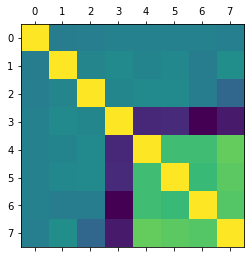

In [4]:
plt.matshow(matrix)
# our data has -ve correlation


># PCA







In [5]:
print(data.columns)
data.columns=["No","x1","x2","x3","x4","x5","x6","x7"]
data.head()

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


,No,x1,x2,x3,x4,x5,x6,x7
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)
print(data_std.shape)
print(data_std)

(414, 8)
[[-1.72787215 -0.82368321  1.25562833 ...  1.12542986  0.44876222
  -0.00590088]
 [-1.71950473 -0.82368321  0.15708622 ...  0.91244418  0.40113894
   0.3105072 ]
 [-1.71113731  1.54115111 -0.38779067 ...  1.48686011  0.68818339
   0.6857819 ]
 ...
 [ 1.71113731  0.35873395  0.09556786 ...  0.82289338  0.42397202
   0.19277396]
 [ 1.71950473 -0.52896662 -0.84478419 ... -0.18475479  0.4768143
   1.06841493]
 [ 1.72787215  1.24643452 -0.98539758 ...  0.42757905  0.63534112
   1.90726426]]


In [7]:
data_covariance_matrix = np.cov(data_std.T)
data_covariance_matrix

array([[ 1.00242131, -0.04877576, -0.03288755, -0.01360636, -0.01272969,
        -0.01013414, -0.01108605, -0.02865639],
       [-0.04877576,  1.00242131,  0.01759126,  0.06102736,  0.00965877,
         0.03514264, -0.04118125,  0.08770245],
       [-0.03288755,  0.01759126,  1.00242131,  0.02568409,  0.04971259,
         0.05455167, -0.04863754, -0.21107689],
       [-0.01360636,  0.06102736,  0.02568409,  1.00242131, -0.60397803,
        -0.59249773, -0.80826911, -0.67524388],
       [-0.01272969,  0.00965877,  0.04971259, -0.60397803,  1.00242131,
         0.44521871,  0.45018641,  0.57238749],
       [-0.01013414,  0.03514264,  0.05455167, -0.59249773,  0.44521871,
         1.00242131,  0.41392376,  0.54762943],
       [-0.01108605, -0.04118125, -0.04863754, -0.80826911,  0.45018641,
         0.41392376,  1.00242131,  0.52455354],
       [-0.02865639,  0.08770245, -0.21107689, -0.67524388,  0.57238749,
         0.54762943,  0.52455354,  1.00242131]])

In [8]:
eig_vals,eig_vecs = np.linalg.eig(data_covariance_matrix)
print('Eigenvector \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvector 
[[-0.00851954  0.52339392 -0.29615438 -0.79790866 -0.02647219 -0.02724784
   0.01229477 -0.00511784]
 [ 0.00388686 -0.48983537  0.62425564 -0.55684554  0.05401816  0.09698767
  -0.00597299 -0.21889242]
 [-0.0387418  -0.66223705 -0.65844973 -0.1777053  -0.03297262 -0.29424365
   0.01369153 -0.08337843]
 [-0.5081568  -0.04612734  0.10188509 -0.03576992 -0.80604558 -0.01719344
   0.08184322  0.26699339]
 [ 0.4153974  -0.11321609 -0.08120112 -0.04816796 -0.10391766  0.38025941
   0.75850657  0.27383393]
 [ 0.40315882 -0.14932007 -0.06147855 -0.09859823 -0.14108034  0.31419585
  -0.62710499  0.53831395]
 [ 0.44212884  0.07555561 -0.07778036  0.08914783 -0.53765534  0.13811464
  -0.13175162 -0.67772333]
 [ 0.4578407   0.06790763  0.24947513 -0.020422   -0.1606511  -0.80036499
   0.08352255  0.22303955]]

Eigenvalues 
[3.27911372 1.09120704 1.05242939 0.95893155 0.14364538 0.3212673
 0.55460782 0.61816826]


In [9]:
tot= sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp= np.cumsum(var_exp)
print('varience captured by each component\n ',var_exp)
print(40 * '-')
print('Cumulative variance captured as we travel each component \n',cum_var_exp)

varience captured by each component
  [40.88991445720896, 13.607140890452477, 13.123591095676682, 11.957691141914264, 7.708438765187794, 6.9158524007050275, 4.00614111801262, 1.7912301308421732]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 40.88991446  54.49705535  67.62064644  79.57833759  87.28677635
  94.20262875  98.20876987 100.        ]


#multicollinearity for Assignment

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_var = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x_var.columns
    vif["VIF"] = [variance_inflation_factor(x_var.values, i) for i in range(x_var.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
vif_data = pd.DataFrame()
vif_data["feature"] = x_var.columns
vif_data["VIF"] = [variance_inflation_factor(x_var.values, i) for i in range(x_var.shape[1])]

In [12]:
vif_data

,feature,VIF
0,x1,4.253389e+07
1,x2,3.471392e+00
2,x3,4.261358e+00
3,x4,4.748152e+00
4,x5,6.178301e+06
5,x6,4.198817e+07



#Factor analysis for Assignment

In [13]:
from sklearn.datasets import load_iris
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

     |████████████████████████████████| 41 kB 517 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=8af699c27ac2fc24c23a0db0ca2cb976370fb116e89e45f6e900046f594c6d0b
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


(1187.9795369290373, 2.032175826657187e-232)

In [14]:
df=pd.read_csv("/content/Real estate.csv")


In [15]:
df.columns=["No","x1","x2","x3","x4","x5","x6","x7"]
df

,No,x1,x2,x3,x4,x5,x6,x7
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [16]:
# Adequacy test 
# tp check whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(1187.9795369290373, 2.032175826657187e-232)

In [17]:
#(KMO) Test 
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [18]:
kmo_model

0.7499814174010048

In [19]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()
# Check Eigenvalues
eigen_values


array([3.27119316, 1.08857127, 1.04988729, 0.95661529, 0.6166751 ,
       0.55326819, 0.32049129, 0.14329841])

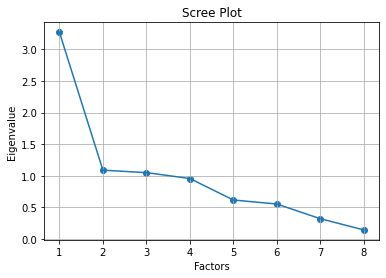

In [20]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [21]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df, 6)
loadings =fa.loadings_
loadings

array([[-0.00527747, -0.02871327, -0.07672082],
       [-0.03165505, -0.02226548,  0.20933795],
       [ 0.05262909,  0.61180872,  0.07312338],
       [-1.01668099, -0.05516896,  0.30374497],
       [ 0.65080232,  0.06637093,  0.11114112],
       [ 0.62587596,  0.07815054,  0.12901554],
       [ 0.78671059, -0.00245464, -0.29017688],
       [ 0.71635491, -0.42068839,  0.40770687]])

In [22]:
# Get variance of each factors
fa.get_factor_variance()

(array([2.98478223, 0.56617108, 0.42674137]),
 array([0.37309778, 0.07077139, 0.05334267]),
 array([0.37309778, 0.44386916, 0.49721183]))

#pca

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
print(data.columns)
data.columns=["No","x1","x2","x3","x4","x5","x6","x7"]


Index(['No', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype='object')


In [25]:

# x= data[['x1','x2','x3','x4','x5','x6']]
# y =data['x7']
parameters = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
x = data.loc[:, parameters].values
y = data.loc[:, ['x7']].values
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
# scaler= StandardScaler()
# x_scaled=scaler.fit_transform(x)
# x_scaled



In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=30)

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
# clf = LogisticRegression()
# clf.fit(x_train, y_train)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.4755655257750959

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
# pca = PCA(0.45)
x_pca = pca.fit_transform(x)
DF = pd.DataFrame(data = x_pca, columns=["PC 1","PC 2","PC 3","PC 4","PC 5"])
DF
# x_pca.shape


,PC 1,PC 2,PC 3,PC 4,PC 5
0,-999.010858,14.595241,-4.243625,0.253698,0.005245
1,-777.296688,2.033806,-3.776002,0.248426,0.004728
2,-521.902948,-4.287987,-0.250344,-0.441166,0.010365
3,-521.902949,-4.288020,-0.249768,-0.358168,0.010551
4,-693.320803,-12.551598,-0.149267,0.302526,0.006188
...,...,...,...,...,...
409,2998.131094,-4.703226,-0.203060,0.189303,-0.008149
410,-993.438327,-11.819502,-3.713722,0.489517,-0.000640
411,-692.919219,1.281487,-1.909931,-0.096694,0.004092
412,-979.078094,-9.392983,0.306933,0.129779,-0.004737


In [29]:
pca.explained_variance_ratio_

array([9.99915063e-01, 8.14419547e-05, 3.44524843e-06, 4.95460729e-08,
       6.45733488e-11])

In [30]:
x_train_pca,x_test_pca , y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [31]:
model = LinearRegression()
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

0.47611406359489394

In [32]:
x_pca

array([[-9.99010858e+02,  1.45952410e+01, -4.24362489e+00,
         2.53698126e-01,  5.24451723e-03],
       [-7.77296688e+02,  2.03380640e+00, -3.77600177e+00,
         2.48426073e-01,  4.72750259e-03],
       [-5.21902948e+02, -4.28798674e+00, -2.50344360e-01,
        -4.41166046e-01,  1.03653717e-02],
       ...,
       [-6.92919219e+02,  1.28148734e+00, -1.90993069e+00,
        -9.66939224e-02,  4.09208515e-03],
       [-9.79078094e+02, -9.39298345e+00,  3.06932871e-01,
         1.29778581e-01, -4.73746840e-03],
       [-9.93438107e+02, -1.09193066e+01, -3.70369490e+00,
        -3.43208045e-01, -2.57150997e-03]])

# LDA Dimension reduction for LAB File

In [33]:
import numpy as np
import pandas as pd

In [34]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [35]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [36]:
#feature scaling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy1.0


#K means clustering

In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [40]:
data=pd.read_csv("/content/Real estate.csv")

In [41]:
x = data.iloc[:,1:7] # 1t for rows and second for columns
x

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [42]:
#clustering
kmeans = KMeans(7)
kmeans.fit(x)

KMeans(n_clusters=7)

In [43]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 3, 0, 0, 0, 2, 0, 3, 4, 2, 0, 3, 0, 6, 5, 0, 3, 3, 0, 3, 2, 3,
       5, 3, 0, 5, 0, 3, 0, 0, 1, 0, 0, 3, 3, 1, 2, 5, 0, 3, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 5, 0, 3, 5, 0, 3, 1, 3, 2, 3, 2, 0, 5, 3,
       3, 3, 0, 0, 3, 0, 0, 1, 0, 5, 0, 2, 0, 5, 0, 0, 3, 6, 0, 3, 5, 1,
       5, 1, 3, 5, 6, 5, 3, 3, 3, 0, 3, 3, 5, 3, 3, 3, 0, 3, 3, 5, 0, 2,
       3, 3, 2, 0, 3, 0, 4, 1, 5, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 2,
       0, 0, 3, 5, 0, 3, 5, 0, 3, 5, 0, 0, 5, 0, 3, 0, 1, 3, 3, 0, 5, 0,
       1, 1, 5, 0, 0, 0, 3, 0, 1, 3, 3, 5, 3, 3, 0, 2, 1, 0, 3, 0, 0, 0,
       1, 3, 5, 0, 1, 3, 2, 1, 6, 5, 2, 6, 3, 1, 0, 0, 3, 0, 1, 0, 0, 3,
       3, 0, 5, 0, 0, 3, 5, 5, 0, 0, 5, 3, 0, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       3, 5, 0, 5, 3, 3, 1, 3, 6, 5, 2, 1, 1, 3, 2, 3, 0, 0, 0, 0, 2, 3,
       2, 3, 5, 0, 0, 5, 5, 4, 0, 5, 3, 2, 3, 4, 3, 0, 3, 0, 5, 2, 3, 2,
       0, 0, 2, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 2, 3, 5, 3, 0, 5, 2, 0, 0,
       3, 0, 3, 3, 0, 3, 0, 0, 3, 2, 5, 0, 1, 3, 3,

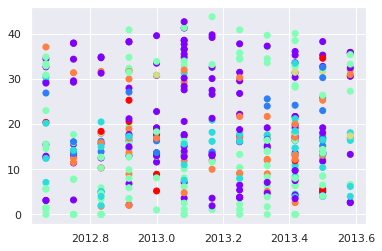

In [44]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
a=data_with_clusters["X1 transaction date"]
b=data_with_clusters["X2 house age"]
plt.scatter(a,b,c=data_with_clusters['Clusters'],cmap='rainbow')